In [54]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("timeseries.csv")
print(df.head())          # Preview first rows
print(df.describe())      # Summary statistics

   generation  fitness_mean   fitness_std  fitness_std  fitness_se  \
0           0      0.029104      0.109364     0.005468         350   
1           1      0.346553      0.239411     0.011971           2   
2           2      0.422462      0.235979     0.011799           0   
3           3      0.459283      0.259742     0.012987           0   
4           4      0.503655      0.258643     0.012932           0   

   unstable_states  perc_unstable  path_mean  path_std  path_se  
0            0.875        4.86000   2.877568  0.143878      NaN  
1            0.005        4.70603   2.851697  0.142585      NaN  
2            0.000        3.89250   2.507178  0.125359      NaN  
3            0.000        3.47500   2.365243  0.118262      NaN  
4            0.000        3.21250   2.208471  0.110424      NaN  
       generation  fitness_mean   fitness_std  fitness_std  fitness_se  \
count  401.000000    401.000000    401.000000   401.000000  401.000000   
mean   200.000000      0.887707    

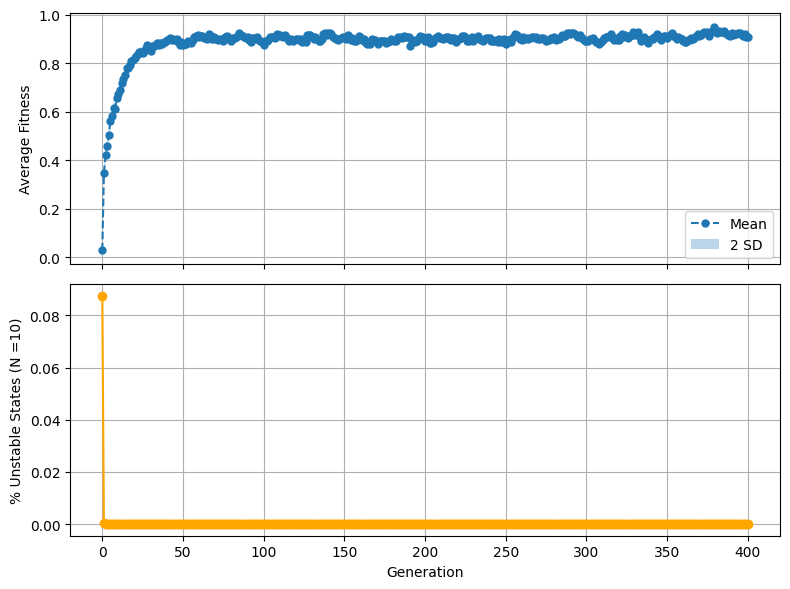

In [56]:
generations = df['generation']
avg_fitness = df['fitness_mean']
std_fitness = df['fitness_std']
n_nets = 10
unstable_states = df['unstable_states']
perc_unstable = unstable_states / n_nets

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot 1: Average Fitness with Standard Error
axes[0].plot(generations, avg_fitness, label='Mean', linestyle = '--', marker = 'o', markersize = 5)
axes[0].fill_between(
    generations,
    avg_fitness - 2*std_fitness,
    avg_fitness + 2*std_fitness,
    alpha=0.3,
    label='2 SD'
)
axes[0].set_ylabel("Average Fitness")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Number of Unstable States
axes[1].plot(generations, perc_unstable, label='% Unstable States', marker='o', color='orange')
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("% Unstable States (N =10)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


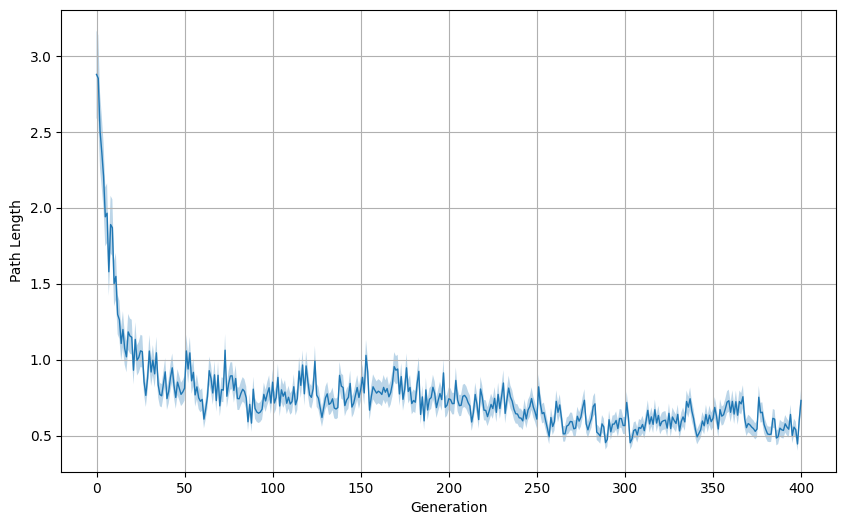

In [57]:
path_mean = df['path_mean']
path_std = df['path_std']


plt.figure(figsize = (10,6))
plt.plot(generations, df['path_mean'], linewidth = 1)
plt.fill_between(
    generations,
    path_mean + 2 * path_std,
    path_mean - 2 * path_std,
    alpha=0.3,
    label='2 SD'
)
plt.xlabel('Generation')
plt.ylabel('Path Length')
plt.grid(True)


In [58]:
# Before vs after evolution

df_comparison = pd.read_csv("initial_final.csv")
print(df_comparison.head())
print(df_comparison.describe())

   mean_path_initial  std_path_initial  se_path_initial  mean_path_final  \
0            4.86000          2.877568         0.909967           1.2850   
1            4.62500          3.025069         0.956611           1.6750   
2            4.73913          2.914990         0.921801           1.7900   
3            4.74000          3.333527         1.054154           2.3325   
4            4.72000          2.498319         0.790038           1.3100   

   std_path_final  se_path_final  perc_completion_initial  \
0        0.730599       0.231036                    0.125   
1        0.651441       0.206004                    0.120   
2        0.828191       0.261897                    0.115   
3        0.762852       0.241235                    0.125   
4        0.537494       0.169971                    0.125   

   perc_completion_final  mutation_stability_initial  mutation_stability_final  
0                    1.0                         0.0                       0.0  
1             

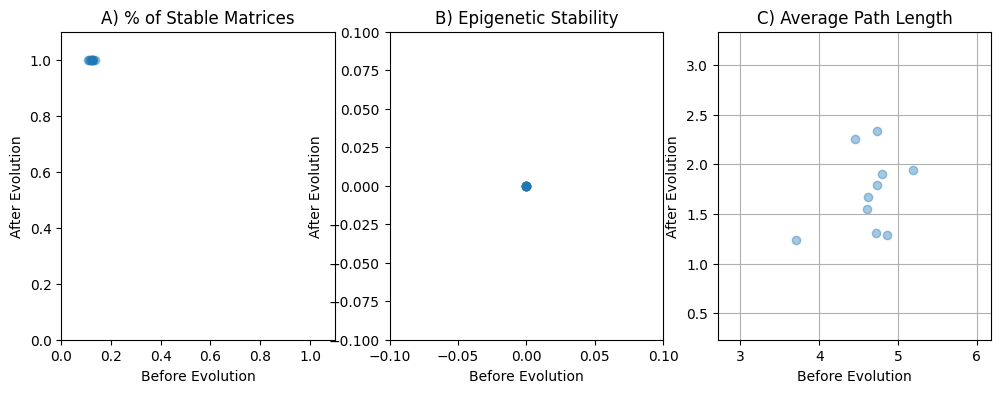

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Percentage of completion

init_perc = df_comparison['perc_completion_initial']
final_perc = df_comparison['perc_completion_final']

axes[0].scatter(init_perc, final_perc, alpha = 0.4)
axes[0].set_title("A) % of Stable Matrices")
axes[0].set_xlabel("Before Evolution")
axes[0].set_ylabel("After Evolution")
axes[0].set_xlim(0, 1.1)
axes[0].set_ylim(0, 1.1)

# Stability

init_mutation = df_comparison['mutation_stability_initial']
final_mutation = df_comparison['mutation_stability_final']

axes[1].scatter(init_mutation, final_mutation, alpha = 0.4)
axes[1].set_title("B) Epigenetic Stability")
axes[1].set_xlabel("Before Evolution")
axes[1].set_ylabel("After Evolution")
axes[1].set_xlim(-.1, .1)
axes[1].set_ylim(-.1, .1)

# Average (complete) path length

init_avg_path = df_comparison["mean_path_initial"]
final_avg_path = df_comparison["mean_path_final"]

axes[2].scatter(init_avg_path, final_avg_path, alpha = 0.4)
axes[2].set_title("C) Average Path Length")
axes[2].set_xlabel("Before Evolution")
axes[2].set_ylabel("After Evolution")
axes[2].set_xlim(min(init_avg_path)-1, max(init_avg_path)+1)
axes[2].set_ylim(min(final_avg_path)-1, max(final_avg_path)+1)
axes[2].grid(True)

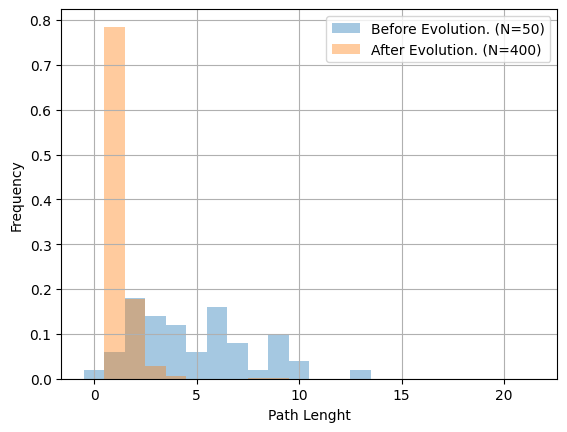

In [60]:
# Distribution of (completed) path lengths

df_dists = pd.read_csv("distributions.csv")
plt.hist(df_dists['path_initial'], density = True, alpha = 0.4, bins=np.arange(0, 22 + 1) - 0.5, label = f"Before Evolution. (N={df_dists['path_initial'].count()})")
plt.hist(df_dists['path_final'], density = True, alpha = 0.4, bins=np.arange(0, 22 + 1) - 0.5, label = f"After Evolution. (N={df_dists['path_final'].count()})")
plt.xlabel("Path Lenght")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show();
